# 1D Advection-Diffusion Equation

In this notebook, we will implement finite difference schemes to solve the 1D partial differential equation for advection and diffusion of a tracer:

$$ \frac{\partial C}{\partial t} + u\frac{\partial C}{\partial x} = \kappa\frac{\partial^{2} C}{\partial x^{2}}$$

where $C$ is a tracer, such as temperature, salinity, dye concentration, $u$ is the flow velocity experienced by the tracer, and $\kappa$ is the diffusion coefficient (diffusivity) of the fluid. As before, we assume diffusivity is constant and uniform. 

***

### Forward Time Centered Space (FTCS)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

First, define the solution space and parameters, and initialize the matrices.

In [11]:
# define the solution space
x0 = 0
xL = 250
L = xL-x0

# define the spatial discretization
n = 249
dx = L/(n+1)
x = np.arange(x0,xL,dx)

# define the temporal discretization
m = 7300
T = 365 
dt = T/m

# define parameters
u = 0.05
kappa = 0.5

# initial conditions
c0 = 1

# define Courant numbers
D = kappa*dt/(dx**2)
S = u*dt/dx
print('D = ',D)
print('S = ',S)

D =  0.025
S =  0.0025000000000000005


In [12]:
# initialize the matrices
A = np.zeros((n,n))

for i in range(n):
    if i == 0:
        A[i, i] = 1-(2*D)
        A[i, i+1] = D-(S/2)
    elif i == n-1:
        A[i, i-1] = D+(S/2)
        A[i, i] = 1-(2*D)
    else:
        A[i, i] = 1-(2*D)
        A[i, i-1] = D+(S/2)
        A[i, i+1] = D-(S/2)

B = np.zeros((n, 1))

Next, impose boundary conditions.

In [13]:
# apply Dirichlet BCs
B[0] = c0*(D+(S/2))
B[n-1] = 0*(D-(S/2))

Create the spatial discretization.

In [14]:
x = np.arange(x0+dx,xL,dx)
t0 = 0

Initialize solution matrices and impose initial condition.

In [15]:
C = np.empty((m, n))
C_xt = np.zeros_like(x)
C[0, :] = C_xt
t = np.zeros((m))
t[0] = t0

Finally, march forward in time.

In [16]:
for i in range(m-1):
    C_n = np.matmul(A, C_xt[:, np.newaxis]) + B
    C[i+1, :] = C_n.flatten()
    C_xt = C_n.flatten()
    t[i+1] = t[i] + dt

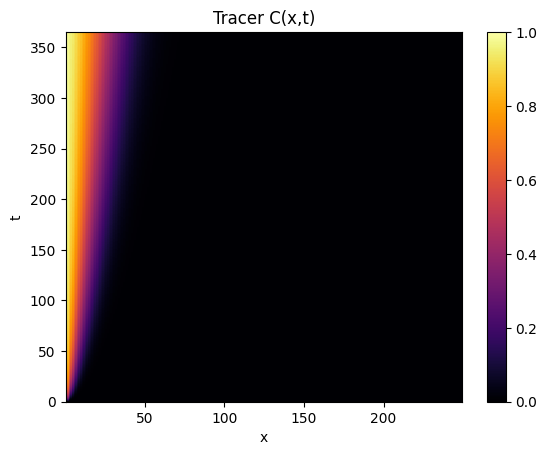

In [21]:
fig, ax = plt.subplots(1)
c = ax.pcolormesh(x, t, C, cmap='inferno', vmin=0, vmax=1)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_title('Tracer C(x,t)')
plt.colorbar(c)

Text(0.5, 1.0, 'Tracer C at t=T')

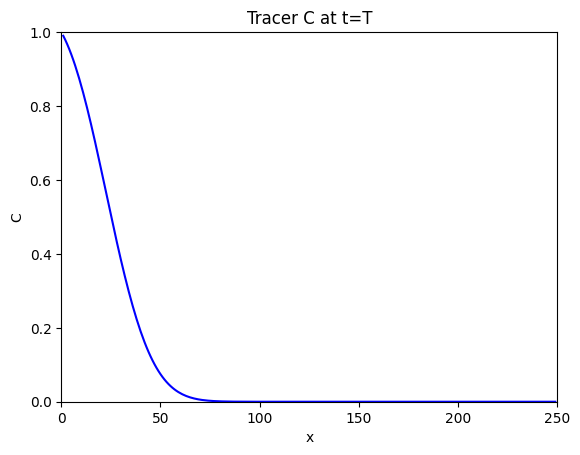

In [22]:
fig, ax = plt.subplots(1)
ax.plot(x, C[-1, :], 'b')
ax.set_xlim([0, 250])
ax.set_ylim([0, 1])
ax.set_xlabel('x')
ax.set_ylabel('C')
ax.set_title('Tracer C at t=T')